In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import psycopg2
from yellowbrick.cluster import KElbowVisualizer
import sqlalchemy as sqlalc
import folium
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np

In [2]:
conn  =  psycopg2.connect(database= 'Criminalidade',user = 'postgres',password = '123456')
#conn  =  psycopg2.connect(host = 'postgres10-crime_sp', database = 'postgres', user = 'postgres', password = 'senha')

In [3]:
df = pd.read_sql_query("""select dim_local.latitude,
    dim_local.longitude, 
    dim_pessoa2.id_cor_cutis 
    from fato_crime
    inner join dim_rubrica2
    on dim_rubrica2.id_dim_rubrica = fato_crime.rubrica
    inner join dim_pessoa2
    on fato_crime.pessoa = dim_pessoa2.id_dim_pessoa
    inner join dim_local
    on fato_crime.local = dim_local.id_dim_local
    where dim_rubrica2.grupo_rubrica = 'homicidio' and 
    dim_pessoa2.descr_tipo_pessoa = 'Vítima' and 
    dim_pessoa2.flag_vitima_fatal = 'S' 
    and (dim_local.latitude <> 0 )""",conn)

In [4]:
df

latitude  longitude  id_cor_cutis
0    -23.775998 -46.697180             5
1    -23.646112 -46.644449             1
2    -23.778130 -46.693201             2
3    -23.688613 -46.775066             1
4    -23.672943 -46.677512             1
5    -23.619789 -46.620440             2
6    -23.773335 -46.708028             2
7    -23.698062 -46.782700             2
8    -23.602854 -46.596317             1
9    -23.850784 -46.752741             1
10   -23.831619 -46.745999             2
11   -23.652212 -46.722075             2
12   -23.639990 -46.697544             2
13   -23.655589 -46.731298             2
14   -23.805619 -46.735882             2
15   -23.644914 -46.641161             1
16   -23.644914 -46.641161             1
17   -23.597288 -46.597370             1
18   -23.652405 -46.705714             2
19   -23.622714 -46.641875             2
20   -23.628879 -46.641378             2
21   -23.628879 -46.641378             1
22   -23.620588 -46.620821             1
23   -23.644434 -46.584688             2
24   -23.618694 -46.589104             1
25   -23.635868 -46.611175             1
26   -23.652442 -46.633879             1
27   -23.692055 -46.743693             1
28   -23.629366 -46.744152             1
29   -23.646846 -46.641098             2
...         ...        ...           ...
3949 -23.594619 -46.593971             1
3950 -23.586521 -46.595721             2
3951 -23.611894 -46.592935             2
3952 -23.604857 -46.699923             2
3953 -23.672105 -46.638710             1
3954 -23.674561 -46.698407             1
3955 -23.625732 -46.615649             5
3956 -23.605699 -46.594556             1
3957 -23.639240 -46.600899             5
3958 -23.613711 -46.638095             1
3959 -23.658061 -46.638196             2
3960 -23.655377 -46.717750             2
3961 -23.692415 -46.714871             1
3962 -23.608268 -46.580392             1
3963 -23.642086 -46.697366             1
3964 -23.653890 -46.723937             5
3965 -23.613621 -46.638077             2
3966 -23.625347 -46.708269             2
3967 -23.615790 -46.699070             2
3968 -23.616302 -46.611034             1
3969 -23.678045 -46.707056             1
3970 -23.633115 -46.605145             5
3971 -23.625347 -46.708269             2
3972 -23.632163 -46.646136             1
3973 -23.629137 -46.624648             1
3974 -23.591821 -46.597979             1
3975 -23.643770 -46.701401             1
3976 -23.734859 -46.698991             5
3977 -23.599427 -46.588420             0
3978 -23.658560 -46.652412             2

[3979 rows x 3 columns]

In [5]:
xrm = df.loc[:,["longitude","latitude", "id_cor_cutis"]].values

Text(0, 0.5, 'latitude')

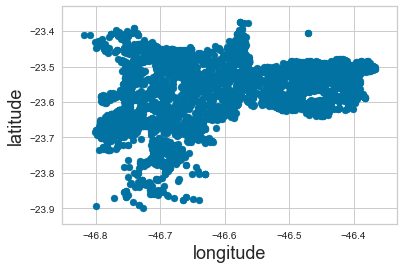

In [6]:
plt.scatter(xrm[:,0], xrm[:,1], cmap='gist_rainbow')
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),timings=True)
elbow = df[['latitude','longitude', 'id_cor_cutis']]
elbow.head()

latitude  longitude  id_cor_cutis
0 -23.775998 -46.697180             5
1 -23.646112 -46.644449             1
2 -23.778130 -46.693201             2
3 -23.688613 -46.775066             1
4 -23.672943 -46.677512             1

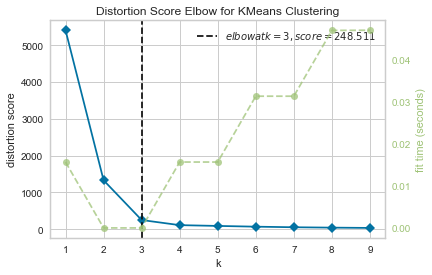

In [8]:
visualizer.fit(elbow) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [9]:
km = KMeans(n_clusters = visualizer.elbow_value_)
km.fit(xrm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
new_labels = km.labels_
new_labels

array([1, 2, 0, ..., 1, 2, 0])

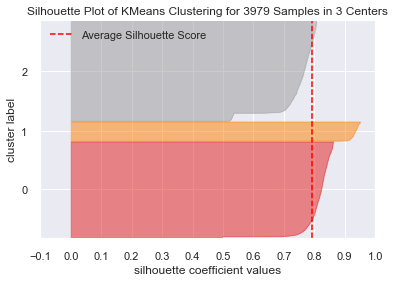

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(km)
model.fit(xrm)
model.show()

In [30]:
model.silhouette_score_

0.7923209460153486

In [33]:
# -*- coding: utf-8 -*-
__author__ = "Joaquim Viegas"

""" JQM_CV - Python implementations of Dunn and Davis Bouldin clustering validity indices
dunn(k_list):
    Slow implementation of Dunn index that depends on numpy
    -- basec.pyx Cython implementation is much faster but flower than dunn_fast()
dunn_fast(points, labels):
    Fast implementation of Dunn index that depends on numpy and sklearn.pairwise
    -- No Cython implementation
davisbouldin(k_list, k_centers):
    Implementation of Davis Boulding index that depends on numpy
    -- basec.pyx Cython implementation is much faster
"""

import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di
    
    
def  big_s(x, center):
    len_x = len(x)
    total = 0
        
    for i in range(len_x):
        total += np.linalg.norm(x[i]-center)    
    
    return total/len_x

def davisbouldin(k_list, k_centers):
    """ Davis Bouldin Index
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    k_centers : np.array
        The array of the cluster centers (prototypes) of type np.array([K, p])
    """
    len_k_list = len(k_list)
    big_ss = np.zeros([len_k_list], dtype=np.float64)
    d_eucs = np.zeros([len_k_list, len_k_list], dtype=np.float64)
    db = 0    

    for k in range(len_k_list):
        big_ss[k] = big_s(k_list[k], k_centers[k])

    for k in range(len_k_list):
        for l in range(0, len_k_list):
            d_eucs[k, l] = np.linalg.norm(k_centers[k]-k_centers[l])

    for k in range(len_k_list):
        values = np.zeros([len_k_list-1], dtype=np.float64)
        for l in range(0, k):
            values[l] = (big_ss[k] + big_ss[l])/d_eucs[k, l]
        for l in range(k+1, len_k_list):
            values[l-1] = (big_ss[k] + big_ss[l])/d_eucs[k, l]

        db += np.max(values)
    res = db/len_k_list
    return res

In [34]:
y_pred = km.predict(xrm)
res =  pd.concat([pd.DataFrame(xrm),pd.DataFrame(new_labels)], axis=1)
res.columns = ['long','lat', 'id_cor_cutis', 'cluster']


# We store the clusters 
clus0 = res.loc[res['cluster'] == 0] 
clus1 = res.loc[res['cluster'] == 1] 
clus2 = res.loc[res['cluster'] == 2] 
cluster_list = [clus0.values, clus1.values, clus2.values] 
  
print(dunn(cluster_list)) 

1.235799100972705


In [11]:

res.head()

0          1    2  0
0 -46.697180 -23.775998  5.0  1
1 -46.644449 -23.646112  1.0  2
2 -46.693201 -23.778130  2.0  0
3 -46.775066 -23.688613  1.0  2
4 -46.677512 -23.672943  1.0  2

In [12]:

res.groupby(by=['cluster','id_cor_cutis']).count()

long   lat
cluster id_cor_cutis            
0       2.0           1752  1752
        3.0             20    20
1       4.0              3     3
        5.0            355   355
2       0.0            151   151
        1.0           1698  1698

In [13]:
m = folium.Map(
    location=[-23.550341, -46.622445],
    zoom_start=12,
    
)


tooltip = 'Click me!'
for i in range(3978):
    teste = 'pardos e amarelos'
    cor = 'green'
    if res['cluster'][i]== 0:
        folium.Circle(
        radius=10,
        location=[res['lat'][i],res['long'][i]],
        popup='The Waterfront',
        color=cor,
        fill=False,
        ).add_to(m)


m

In [14]:
m = folium.Map(
    location=[-23.550341, -46.622445],
    zoom_start=12,
    
)


tooltip = 'Click me!'
for i in range(3978):
    teste = 'negros e vermelhos'
    cor = 'crimson'
    if res['cluster'][i]== 1:
        folium.Circle(
        radius=10,
        location=[res['lat'][i],res['long'][i]],
        popup='The Waterfront',
        color=cor,
        fill=False,
        ).add_to(m)


m

In [15]:
m = folium.Map(
    location=[-23.550341, -46.622445],
    zoom_start=12,
    
)


tooltip = 'Click me!'
for i in range(3978):
    teste = 'brancos e outros'
    cor = 'blue'
    if res['cluster'][i]== 2:
        folium.Circle(
        radius=10,
        location=[res['lat'][i],res['long'][i]],
        popup='The Waterfront',
        color=cor,
        fill=False,
        ).add_to(m)


m